## Parametrisierung der Dichtekurve
Anhand von 3 Punkten:

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils.targets import parameters, target, Zielwert

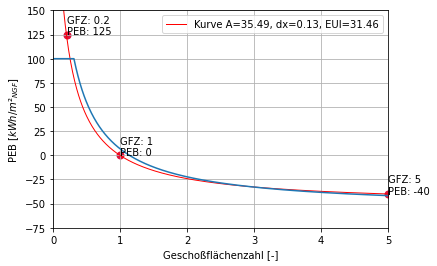

In [17]:
p1 = (0.2, 125)
p2 = (1, 0)
p3 = (5, -40)

GFZ = np.linspace(0.0, 5, 500) #min, max, steps

A, dx, EUI, fPE, scale = parameters(p1, p2, p3, fPE=1.63)
A, dx, EUI = round(A,2), round(dx,2), round(EUI, 2)

points = [p1, p2, p3]

df = pd.DataFrame({
    f"Kurve {A=}, {dx=}, {EUI=}": target(GFZ, A=A, dx=dx, EUI=EUI, fPE=fPE, scale=scale),},
     index=GFZ)

ax = df.plot(linewidth=1, color="red")
ax.set_ylim(-100,200)

ax.scatter(*zip(*points), marker="o", color="crimson", linewidth=2);
for x, y in points:
    ax.annotate(f"GFZ: {x}\nPEB: {y}", (x, y))

from utils.plotting import target_of_gfz

zq = Zielwert.ZQSynergyOktober()
zq_df = pd.DataFrame({
    "Vorschlag Oktober (NGF)": zq.alpha_zielwert_ngf(GFZ),
    "Vorschlag Oktober (BGF)": zq.alpha_zielwert_bgf(GFZ)
}, index=GFZ)

target_of_gfz(ax, zq_df["Vorschlag Oktober (NGF)"], no_legend=False, xlims=(GFZ[0], GFZ[-1]))
ax.set_ylabel("PEB $[kWh/m²_{NGF}]$")

plt.savefig("kurvenparametrisierung.png")

In [20]:
zq.alpha_zielwert_ngf(0.23)

100.0

-40.46095930232558
1 0.07086956521739886
0.75 15.03222222222222
4.58 -40.694862579281185
5 -41.76281553398058
asymp -53.7838060929086


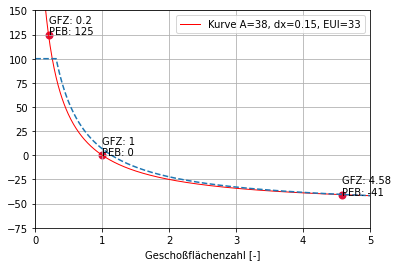

In [59]:
#BGF

p1 = (0.2, 125)
p2 = (1, 0)
p3 = (4.58, -41)
points = [p1, p2, p3]

zq_neu = Zielwert.from_points(points)
zq_neu.A = 38
zq_neu.EUI = 33
A = zq_neu.A
dx = zq_neu.dx
EUI = zq_neu.EUI

zq_neu = Zielwert(A=38,dx=0.15, EUI=33)
df = pd.DataFrame({
    f"Kurve {A=}, {dx=}, {EUI=}": zq_neu.alpha_zielwert_bgf(GFZ),},
     index=GFZ)

ax = df.plot(linewidth=1, color="red")
ax.set_ylim(-100,200)

a = [*zip(*points)]
ax.scatter(*a, marker="o", color="crimson", linewidth=2);
for x, y in points:
    ax.annotate(f"GFZ: {x}\nPEB: {y}", (x, y))


target_of_gfz(ax, zq_df["Vorschlag Oktober (NGF)"], linestyle="dashed", xlims=(GFZ[0], GFZ[-1]))

print(zq.alpha_zielwert_ngf(4.58))
print(1, zq_neu.alpha_zielwert_bgf(1))
print(0.75, zq_neu.alpha_zielwert_bgf(0.75))
print(4.58, zq_neu.alpha_zielwert_bgf(4.58))
print(5, zq_neu.alpha_zielwert_bgf(5))
print("asymp", zq_neu.alpha_zielwert_bgf(10000))

plt.savefig("kurve_letztstand.png", dpi=300)